In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 1) how many cluster does it has in KMeans?

In [31]:
seeds = pd.read_csv('Datasets/seeds_dataset.txt', sep='\t', header=None, error_bad_lines=False)
print(seeds.head())
print(seeds.shape)
samples = seeds.values
print(samples[0:5])

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
(199, 8)
[[15.26   14.84    0.871   5.763   3.312   2.221   5.22    1.    ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956   1.    ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825   1.    ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805   1.    ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175   1.    ]]


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


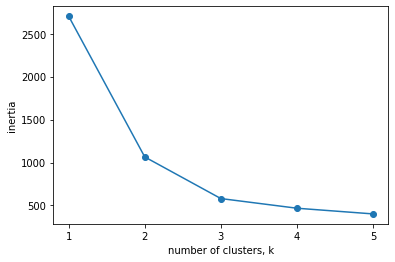

In [32]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

## 2) Basic evaluating accuracy of clustering 

In [33]:
grains = pd.read_csv('Datasets/Grains/seeds.csv', header=None)
print(grains.head())
print(grains.shape)
samples = grains.iloc[:,0:7].values
print(samples[0:5])

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
(210, 8)
[[15.26   14.84    0.871   5.763   3.312   2.221   5.22  ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825 ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]]


In [34]:
varietes = ['Kama wheat', 'Rosa wheat', 'Canadian wheat']

In [35]:
grains[7] = grains[7].apply(lambda x : varietes[0] if x==1 else x)
grains[7] = grains[7].apply(lambda x : varietes[1] if x==2 else x)
grains[7] = grains[7].apply(lambda x : varietes[2] if x==3 else x)
grains.head(1)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,Kama wheat


In [36]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': grains[7]})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0


### The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good.

# Note: Both supervised learning and unsupervised learning learns from data. The best important difference between them is about target variable. Supervised learning use target variable in datasets to learn while unsupervised learning don't need target variable to learn because it can find patterns by using only predictor variables (features).  

## 3) Standardization and its effect to Clustering

In [37]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [38]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': grains[7]})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       4          62           5
1                      66           6           0
2                       0           2          65


### When comparing this cross table with the above cross table, It looks like grains data separates really well into 3 clusters thanks to standardization!

## 4) Normalizer vs Standart Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
data = [[4, 1, 2, 2],[1, 3, 9, 3],[5, 7, 5, 1]]
scaler = StandardScaler()
scaler.fit(data)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_) # mean value for each column
print('****')
print(scaler.transform(data))

[3.33333333 3.66666667 5.33333333 2.        ]
****
[[ 0.39223227 -1.06904497 -1.16247639  0.        ]
 [-1.37281295 -0.26726124  1.27872403  1.22474487]
 [ 0.98058068  1.33630621 -0.11624764 -1.22474487]]


In [40]:
from sklearn.preprocessing import Normalizer
data = [[4, 1, 2, 2],[1, 3, 9, 3],[5, 7, 5, 1]]
transformer = Normalizer().fit(data)  # fit does nothing.
Normalizer(copy=True, norm='l2')
transformer.transform(data)

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

## 5)Hierarchical clustering vs KMeans

#### We used k-means clustering to cluster companies according to grain samples. And we found that 3-cluster is better. Now, we'll perform hierarchical clustering of the companies. 

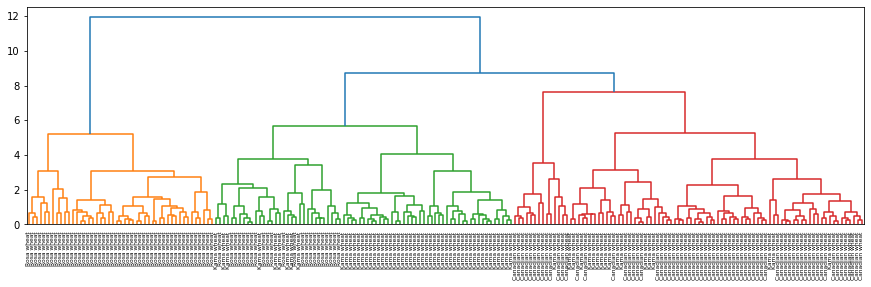

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

plt.figure(figsize=(15,4))
# Plot the dendrogram
dendrogram(mergings, 
            labels=grains.iloc[:,7].values,
            leaf_rotation=90,
            leaf_font_size=6)

plt.show()

#### You see three colour, they represents clusters, Canadian wheat(red)  Kama wheat(green),  Rosa wheat (orange)

### We saw that the intermediate clustering of the grain samples at height 8 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [42]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 8, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': grains.iloc[:,7].values})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      70          18           0


## 6)t-SNE (T-distrubuted stochastic neighbor embedding)

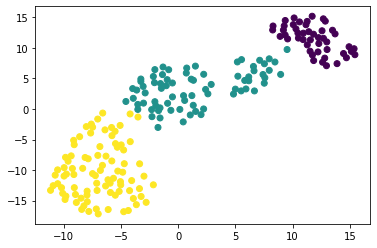

In [43]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=labels)
plt.show()

#### As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. 

## 7) PCA - (Pricipal Component Analysis)
Firstly we will see how PCA works, and then perform PCA on fish dataset.
<br>First step, decorrelation
<br>Second step, reduce dimension

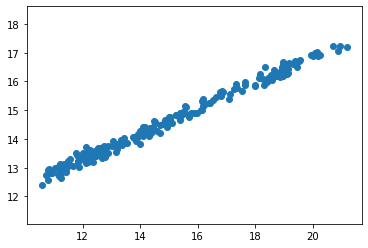

0.9943409310122264


In [44]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains.iloc[:,0].values

# Assign the 1st column of grains: length
length = grains.iloc[:,1].values

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

#### As you would expect, the width and length of the grain samples are highly correlated.

### Decorrelating the grain measurements with PCA

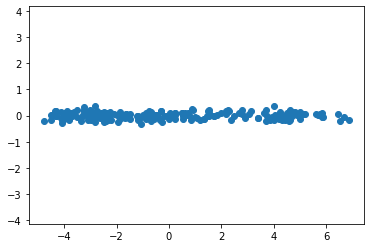

1.5612511283791264e-17


In [45]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains.iloc[:, 0:2].values)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

#### You've successfully decorrelated the grain measurements with PCA!

### The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

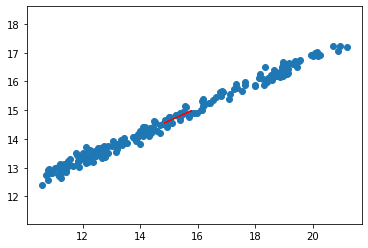

In [46]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0].values, grains.iloc[:,1].values)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains.iloc[:,0:2].values)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

#### This is the direction in which the grain data varies the most.

In [47]:
fish = pd.read_csv('Datasets/fish.csv', header=None)
measurements = fish.iloc[:, 1:].values
varietes = fish.iloc[:, 0].values
fish.head(2)

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8


### The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

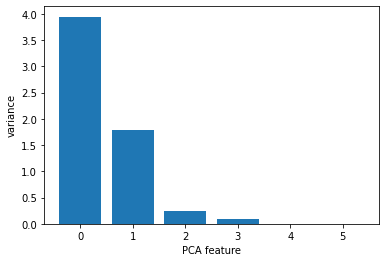

In [48]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(measurements)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#### It looks like PCA features 0 and 1 have significant variance. The intrinsic dimension of this dataset appears to be 2. n_components must be "2".

### Dimension reduction of the fish measurements

In [49]:
fish.shape

(85, 7)

In [50]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(measurements)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(measurements)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


#### We've successfully reduced the dimensionality from 6 to 2.

## 8) word-frequency with TruncatedSVD which has PCA style 
TruncatedSVD is able to perform PCA on sparse arrays in word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia.
<br>wikipedia-vectors.csv is a word frequency array. it shows frequency of 13625 words in 60 articles.

In [2]:
from scipy.sparse import csr_matrix
df = pd.read_csv('Datasets/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
print(df.shape)
df.head(2)

(13125, 60)


,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00611,0.0


In [4]:
articles = csr_matrix(df.transpose())
titles = list(df.columns)
print(articles.shape)
articles[0:2]

(60, 13125)


<2x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 545 stored elements in Compressed Sparse Row format>

In [52]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd to reduce dimension from 13125 to 50
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [53]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
37      0                                       Football
35      0                Colombia national football team
34      0                             Zlatan Ibrahimović
33      0                                 Radamel Falcao
32      0                                   Arsenal F.C.
31      0                              Cristiano Ronaldo
30      0                  France national football team
38      0                                         Neymar
39      0                                  Franck Ribéry
36      0              2014 FIFA World Cup qualification
41      1                                    Hepatitis B
42      1                                    Doxycycline
43      1                                       Leukemia
44      1                                           Gout
40      1                                    Tonsillitis
46      1                                     Prednisone
47      1                      

## 9) NMF (Non-negative Matrix Factorization)
Firstly, we reduce the number of feature (columns) from 13625 to 6. Each title has a value for each 6 cluster. The highest value show their real cluster.
<br>model.components_ means their real cluster value of each features.
<br> wikipedia-vectors.csv is a word frequency array. it shows frequency of 13625 words in 60 articles.

In [54]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

In [55]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575696
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422370
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


#### Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

In [56]:
words = []
with open('Datasets/Wikipedia articles/wikipedia-vocabulary-utf8.txt', 'r') as file:
    words=file.read()
words = words.split()
len(words)

13125

In [57]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3] 

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627892
award      0.253138
starred    0.245290
role       0.211456
actress    0.186402
Name: 3, dtype: float64


#### Here, we see features (film, award, ...) which has the largest values (strong relationship) in 3rd cluster. We were aware of that the value of 3rd cluster in 'Anne Hathaway' and 'Denzel Washington' had the high value in 3rd cluster. Now, in 3rd cluster, we see the most highest features are film, award, starred, role, actress. we can infer that 3rd cluster is about cinema. The topic that the articles about Anne Hathaway and Denzel Washington have in common are film, award, starred,role, actress. Similar documents like Anne Hathaway and Denzel Washington have similar NMF feature values. In other words, similar documents have similar topics.

## Another example for NMF
You are given 100 images as a csv file (lcd-digits.csv), where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


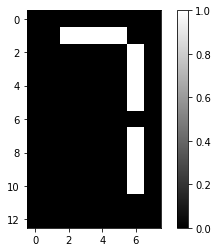

In [58]:
images = pd.read_csv('Datasets/lcd-digits.csv', header=None)

# Select the 0th row: digit 
digit = images.iloc[0].values

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

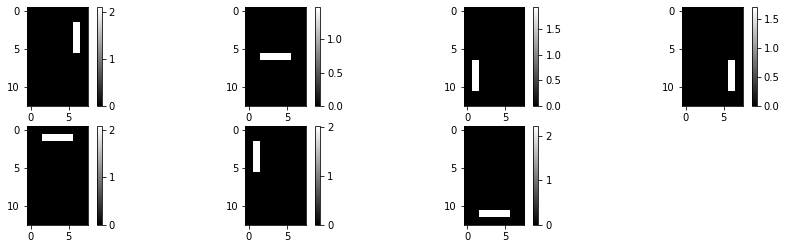

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37546142e-16]


In [59]:
plt.figure(figsize=(15,4))

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(images.values)

# Call show_as_image on each component
for n, component in enumerate(model.components_):
    plt.subplot(2, 4, n+1)
    bitmap = component.reshape((13, 8))
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()

plt.show()

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

#### Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

### if we make samething with PCA

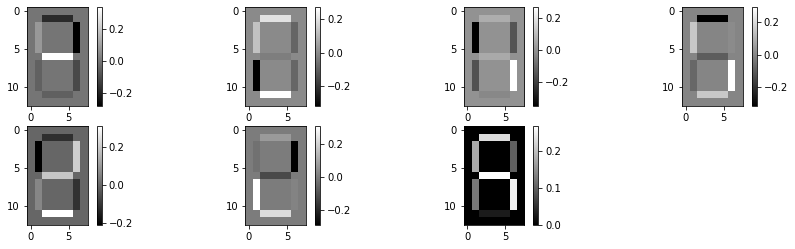

In [61]:
plt.figure(figsize=(15,4))

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(images.values)

for n, component in enumerate(model.components_):
    plt.subplot(2, 4, n+1)
    bitmap = component.reshape((13, 8))
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()

plt.show()

#### Notice that the components of PCA do not represent meaningful parts of images of LED digits!

## 10) Building recommender systems using NMF
wikipedia-vectors.csv is a word frequency array. it shows frequency of 13625 words in 60 articles.
<br>It will be applied the .dot() method of df to article to calculate the cosine similarity of every row with article.

In [62]:
# Perform the necessary imports
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


#### Although you may need to know a little about football (or soccer, depending on where you're from!) to be able to evaluate for yourself the quality of the computed similarities!

### Another example with NMF (musical artists)
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In [93]:
artists = pd.read_csv('Datasets/Musical artists/artists.csv', header=None)
artists = artists[0].values
print(artists.shape)
users = pd.read_csv('Datasets/Musical artists/scrobbler-small-sample.csv')
print(users.head(2))

(111,)
   user_offset  artist_offset  playcount
0            1             79         58
1            1             84         80


In [94]:
users_pivot = users.pivot(index = 'artist_offset', columns = 'user_offset', values='playcount')
print(users_pivot.shape)

(111, 500)


In [95]:
users_pivot.index = artists
print(users_pivot.iloc[0:2, 0:5])

user_offset         0      1      2   3   4
Massive Attack    NaN    NaN  105.0 NaN NaN
Sublime         128.0  211.0    NaN NaN NaN


In [101]:
users_pivot = users_pivot.replace(np.nan, 0)

In [102]:
features = users_pivot.iloc[:, 1:].values

In [103]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf, we create 20 clusters of type of users.
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(features)

In [105]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artists)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.956562
Van Morrison         0.873560
Leonard Cohen        0.865503
Bob Dylan            0.860556
dtype: float64
